In [1]:
import re
import pandas as pd
import numpy as np
import json
import string
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [2]:
data = pd.DataFrame({
    'full_text': [
        "semangat buat yang lagi utbk di unnes",
        "elena unnes lagi error",
        "ada yang utbk di gedung arsip?",
        "minimal kelasnya ada ac dong, jelek bgt",
        "pelayanan akademik di unnes sangat memuaskan",
        "wifi di kampus susah banget connect, tolong dong",
        "kampus unnes hijau dan sejuk, bikin betah belajar",
        "harapannya gedung baru bisa dipakai semester depan",
        "fasilitas olahraga di unnes lengkap dan bagus",
        "sistem registrasi ulang masih membingungkan",
        "maaf ya, ruang lab sering penuh",
        "mohon perbaiki aplikasi elearning, suka lag",
        "makanan di kantin enak tapi agak mahal",
        "akses ke perpustakaan sering sulit",
        "pelayanan admin di fakultas cepat dan ramah",
        "tempat parkir motor penuh terus, susah cari tempat",
        "kampus sering kebanjiran kalau hujan deras",
        "harap dosen lebih sering gunakan teknologi di kelas",
        "toilet di gedung D bersih dan wangi",
        "kelas daring kadang terkendala sinyal, jadi kurang efektif"
    ]
})

In [3]:
# data = pd.read_csv('dataset-dikit.csv', delimiter=';')

In [4]:

with open('stopwords.json', 'r') as file:
    stopwords_arr = json.load(file)
df_slang = pd.read_csv('kamus.csv', delimiter=';')
df_lexicon = pd.read_csv('lexicon.csv', delimiter=';')

stemmer = StemmerFactory().create_stemmer()

In [5]:
def cleaning(text):
    text = text.replace('di', '')
    text = text.replace('yang', '')
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'/n', ' ', text)
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', ' ', text)
    text = re.sub(r' +', ' ', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'(?<!\bunnes)(\w)(\1+)(?=\s|[\.,!])', r'\1', text)
    text = text.strip(' ')
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = text.lower()  
    return text

def replace_word(text):
    elongated_words = re.findall(r'\b\w*(?:(\w)\1{2,})\w*\b', text)
    for word in elongated_words:
        replacement = word[0]
        text = re.sub(r'\b' + re.escape(word) + r'\b', replacement, text)
    return text

def tokenize(text):
    text = word_tokenize(text)
    return text

def translate_slang(tokens):
    translated_tokens = []
    slang_dict = df_slang.set_index('singkatan').to_dict()['kata']
    for word in tokens:
        translated_tokens.append(slang_dict.get(word, word))
    return translated_tokens
    
def stemming(tokens):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

def calculate_score(tokens, df_lexicon):
    score = 0
    for token in tokens:
        if token in df_lexicon['word'].values:
            score += df_lexicon[df_lexicon['word'] == token]['weight'].values[0]
    return score

def sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [6]:
data['clean_text'] = data['full_text'].apply(cleaning)
data

,full_text,clean_text
0,semangat buat yang lagi utbk di unnes,semangat buat lagi utbk unnes
1,elena unnes lagi error,elena unnes lagi error
2,ada yang utbk di gedung arsip?,ada utbk gedung arsip
3,"minimal kelasnya ada ac dong, jelek bgt",minimal kelasnya ada ac dong jelek bgt
4,pelayanan akademik di unnes sangat memuaskan,pelayanan akademik unnes sangat memuaskan
5,"wifi di kampus susah banget connect, tolong dong",wifi kampus susah banget connect tolong dong
6,"kampus unnes hijau dan sejuk, bikin betah belajar",kampus unnes hijau dan sejuk bikin betah belajar
7,harapannya gedung baru bisa dipakai semester d...,harapannya gedung baru bisa pakai semester depan
8,fasilitas olahraga di unnes lengkap dan bagus,fasilitas olahraga unnes lengkap dan bagus
9,sistem registrasi ulang masih membingungkan,sistem registrasi ulang masih membingungkan


In [7]:
data['clean_text'] = data['clean_text'].apply(replace_word)
data

,full_text,clean_text
0,semangat buat yang lagi utbk di unnes,semangat buat lagi utbk unnes
1,elena unnes lagi error,elena unnes lagi error
2,ada yang utbk di gedung arsip?,ada utbk gedung arsip
3,"minimal kelasnya ada ac dong, jelek bgt",minimal kelasnya ada ac dong jelek bgt
4,pelayanan akademik di unnes sangat memuaskan,pelayanan akademik unnes sangat memuaskan
5,"wifi di kampus susah banget connect, tolong dong",wifi kampus susah banget connect tolong dong
6,"kampus unnes hijau dan sejuk, bikin betah belajar",kampus unnes hijau dan sejuk bikin betah belajar
7,harapannya gedung baru bisa dipakai semester d...,harapannya gedung baru bisa pakai semester depan
8,fasilitas olahraga di unnes lengkap dan bagus,fasilitas olahraga unnes lengkap dan bagus
9,sistem registrasi ulang masih membingungkan,sistem registrasi ulang masih membingungkan


In [8]:
data['clean_text'] = data['clean_text'].apply(tokenize)
data

,full_text,clean_text
0,semangat buat yang lagi utbk di unnes,"[semangat, buat, lagi, utbk, unnes]"
1,elena unnes lagi error,"[elena, unnes, lagi, error]"
2,ada yang utbk di gedung arsip?,"[ada, utbk, gedung, arsip]"
3,"minimal kelasnya ada ac dong, jelek bgt","[minimal, kelasnya, ada, ac, dong, jelek, bgt]"
4,pelayanan akademik di unnes sangat memuaskan,"[pelayanan, akademik, unnes, sangat, memuaskan]"
5,"wifi di kampus susah banget connect, tolong dong","[wifi, kampus, susah, banget, connect, tolong,..."
6,"kampus unnes hijau dan sejuk, bikin betah belajar","[kampus, unnes, hijau, dan, sejuk, bikin, beta..."
7,harapannya gedung baru bisa dipakai semester d...,"[harapannya, gedung, baru, bisa, pakai, semest..."
8,fasilitas olahraga di unnes lengkap dan bagus,"[fasilitas, olahraga, unnes, lengkap, dan, bagus]"
9,sistem registrasi ulang masih membingungkan,"[sistem, registrasi, ulang, masih, membingungkan]"


In [9]:
data['clean_text'] = data['clean_text'].apply(translate_slang)
data

,full_text,clean_text
0,semangat buat yang lagi utbk di unnes,"[semangat, buat, lagi, utbk, unnes]"
1,elena unnes lagi error,"[elena, unnes, lagi, error]"
2,ada yang utbk di gedung arsip?,"[ada, utbk, gedung, arsip]"
3,"minimal kelasnya ada ac dong, jelek bgt","[minimal, kelasnya, ada, ac, dong, jelek, sang..."
4,pelayanan akademik di unnes sangat memuaskan,"[pelayanan, akademik, unnes, sangat, memuaskan]"
5,"wifi di kampus susah banget connect, tolong dong","[wifi, kampus, susah, sekali , connect, tolong..."
6,"kampus unnes hijau dan sejuk, bikin betah belajar","[kampus, unnes, hijau, dan, sejuk, bikin, beta..."
7,harapannya gedung baru bisa dipakai semester d...,"[harapannya, gedung, baru, bisa, pakai, semest..."
8,fasilitas olahraga di unnes lengkap dan bagus,"[fasilitas, olahraga, unnes, lengkap, dan, bagus]"
9,sistem registrasi ulang masih membingungkan,"[sistem, registrasi, ulang, masih, membingungkan]"


In [10]:
data['clean_text'] = data['clean_text'].apply(stemming)
data

,full_text,clean_text
0,semangat buat yang lagi utbk di unnes,"[semangat, buat, lagi, utbk, unnes]"
1,elena unnes lagi error,"[elena, unnes, lagi, error]"
2,ada yang utbk di gedung arsip?,"[ada, utbk, gedung, arsip]"
3,"minimal kelasnya ada ac dong, jelek bgt","[minimal, kelas, ada, ac, dong, jelek, sangat]"
4,pelayanan akademik di unnes sangat memuaskan,"[layan, akademik, unnes, sangat, muas]"
5,"wifi di kampus susah banget connect, tolong dong","[wifi, kampus, susah, sekali, connect, tolong,..."
6,"kampus unnes hijau dan sejuk, bikin betah belajar","[kampus, unnes, hijau, dan, sejuk, bikin, beta..."
7,harapannya gedung baru bisa dipakai semester d...,"[harap, gedung, baru, bisa, pakai, semester, d..."
8,fasilitas olahraga di unnes lengkap dan bagus,"[fasilitas, olahraga, unnes, lengkap, dan, bagus]"
9,sistem registrasi ulang masih membingungkan,"[sistem, registrasi, ulang, masih, bingung]"


In [11]:
data['score'] = data['clean_text'].apply(lambda x: calculate_score(x, df_lexicon))
data

,full_text,clean_text,score
0,semangat buat yang lagi utbk di unnes,"[semangat, buat, lagi, utbk, unnes]",4
1,elena unnes lagi error,"[elena, unnes, lagi, error]",-5
2,ada yang utbk di gedung arsip?,"[ada, utbk, gedung, arsip]",0
3,"minimal kelasnya ada ac dong, jelek bgt","[minimal, kelas, ada, ac, dong, jelek, sangat]",-11
4,pelayanan akademik di unnes sangat memuaskan,"[layan, akademik, unnes, sangat, muas]",10
5,"wifi di kampus susah banget connect, tolong dong","[wifi, kampus, susah, sekali, connect, tolong,...",-7
6,"kampus unnes hijau dan sejuk, bikin betah belajar","[kampus, unnes, hijau, dan, sejuk, bikin, beta...",0
7,harapannya gedung baru bisa dipakai semester d...,"[harap, gedung, baru, bisa, pakai, semester, d...",5
8,fasilitas olahraga di unnes lengkap dan bagus,"[fasilitas, olahraga, unnes, lengkap, dan, bagus]",4
9,sistem registrasi ulang masih membingungkan,"[sistem, registrasi, ulang, masih, bingung]",-6


In [12]:
data['sentimen'] = data['score'].apply(sentiment)
data

,full_text,clean_text,score,sentimen
0,semangat buat yang lagi utbk di unnes,"[semangat, buat, lagi, utbk, unnes]",4,positive
1,elena unnes lagi error,"[elena, unnes, lagi, error]",-5,negative
2,ada yang utbk di gedung arsip?,"[ada, utbk, gedung, arsip]",0,neutral
3,"minimal kelasnya ada ac dong, jelek bgt","[minimal, kelas, ada, ac, dong, jelek, sangat]",-11,negative
4,pelayanan akademik di unnes sangat memuaskan,"[layan, akademik, unnes, sangat, muas]",10,positive
5,"wifi di kampus susah banget connect, tolong dong","[wifi, kampus, susah, sekali, connect, tolong,...",-7,negative
6,"kampus unnes hijau dan sejuk, bikin betah belajar","[kampus, unnes, hijau, dan, sejuk, bikin, beta...",0,neutral
7,harapannya gedung baru bisa dipakai semester d...,"[harap, gedung, baru, bisa, pakai, semester, d...",5,positive
8,fasilitas olahraga di unnes lengkap dan bagus,"[fasilitas, olahraga, unnes, lengkap, dan, bagus]",4,positive
9,sistem registrasi ulang masih membingungkan,"[sistem, registrasi, ulang, masih, bingung]",-6,negative


In [13]:
data

,full_text,clean_text,score,sentimen
0,semangat buat yang lagi utbk di unnes,"[semangat, buat, lagi, utbk, unnes]",4,positive
1,elena unnes lagi error,"[elena, unnes, lagi, error]",-5,negative
2,ada yang utbk di gedung arsip?,"[ada, utbk, gedung, arsip]",0,neutral
3,"minimal kelasnya ada ac dong, jelek bgt","[minimal, kelas, ada, ac, dong, jelek, sangat]",-11,negative
4,pelayanan akademik di unnes sangat memuaskan,"[layan, akademik, unnes, sangat, muas]",10,positive
5,"wifi di kampus susah banget connect, tolong dong","[wifi, kampus, susah, sekali, connect, tolong,...",-7,negative
6,"kampus unnes hijau dan sejuk, bikin betah belajar","[kampus, unnes, hijau, dan, sejuk, bikin, beta...",0,neutral
7,harapannya gedung baru bisa dipakai semester d...,"[harap, gedung, baru, bisa, pakai, semester, d...",5,positive
8,fasilitas olahraga di unnes lengkap dan bagus,"[fasilitas, olahraga, unnes, lengkap, dan, bagus]",4,positive
9,sistem registrasi ulang masih membingungkan,"[sistem, registrasi, ulang, masih, bingung]",-6,negative


In [14]:
# Menghitung jumlah labelling positif, netral, dan negatif
jumlah_sentimen = data['sentimen'].value_counts()

# Menampilkan hasil
print(jumlah_sentimen)
data.shape

sentimen
positive    9
negative    7
neutral     4
Name: count, dtype: int64


(20, 4)

In [15]:
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join(x))
data

,full_text,clean_text,score,sentimen
0,semangat buat yang lagi utbk di unnes,semangat buat lagi utbk unnes,4,positive
1,elena unnes lagi error,elena unnes lagi error,-5,negative
2,ada yang utbk di gedung arsip?,ada utbk gedung arsip,0,neutral
3,"minimal kelasnya ada ac dong, jelek bgt",minimal kelas ada ac dong jelek sangat,-11,negative
4,pelayanan akademik di unnes sangat memuaskan,layan akademik unnes sangat muas,10,positive
5,"wifi di kampus susah banget connect, tolong dong",wifi kampus susah sekali connect tolong dong,-7,negative
6,"kampus unnes hijau dan sejuk, bikin betah belajar",kampus unnes hijau dan sejuk bikin betah ajar,0,neutral
7,harapannya gedung baru bisa dipakai semester d...,harap gedung baru bisa pakai semester depan,5,positive
8,fasilitas olahraga di unnes lengkap dan bagus,fasilitas olahraga unnes lengkap dan bagus,4,positive
9,sistem registrasi ulang masih membingungkan,sistem registrasi ulang masih bingung,-6,negative


In [16]:
sentiment_mapping = {
    'negative': -1,
    'neutral': 0,
    'positive': 1
}
data['sentimen'] = data['sentimen'].map(sentiment_mapping)
data

,full_text,clean_text,score,sentimen
0,semangat buat yang lagi utbk di unnes,semangat buat lagi utbk unnes,4,1
1,elena unnes lagi error,elena unnes lagi error,-5,-1
2,ada yang utbk di gedung arsip?,ada utbk gedung arsip,0,0
3,"minimal kelasnya ada ac dong, jelek bgt",minimal kelas ada ac dong jelek sangat,-11,-1
4,pelayanan akademik di unnes sangat memuaskan,layan akademik unnes sangat muas,10,1
5,"wifi di kampus susah banget connect, tolong dong",wifi kampus susah sekali connect tolong dong,-7,-1
6,"kampus unnes hijau dan sejuk, bikin betah belajar",kampus unnes hijau dan sejuk bikin betah ajar,0,0
7,harapannya gedung baru bisa dipakai semester d...,harap gedung baru bisa pakai semester depan,5,1
8,fasilitas olahraga di unnes lengkap dan bagus,fasilitas olahraga unnes lengkap dan bagus,4,1
9,sistem registrasi ulang masih membingungkan,sistem registrasi ulang masih bingung,-6,-1


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
import random

# Assuming data is already loaded
X = data['clean_text']
y = data['sentimen']

# Set random seed for reproducibility
random_seed = 5
np.random.seed(random_seed)
random.seed(random_seed)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

# TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Feature selection
selector = SelectKBest(chi2, k=20)  
X_train_chi2 = selector.fit_transform(X_train_tfidf, y_train)
X_test_chi2 = selector.transform(X_test_tfidf)


In [18]:
pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

,ac,ada,admin,agak,ajar,akademik,aplikasi,arsip,bagus,baik,...,teknologi,tempat,terus,toilet,tolong,unnes,utbk,wangi,wifi,ya
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.404091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.431706
2,0.407107,0.354539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447076,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.316616,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.388946,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.275449,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.648311,0.324156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.493337,0.000000,0.000000,0.000000,0.493337,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.408248,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
pd.DataFrame(X_train_chi2.toarray(), columns=selector.get_feature_names_out())

,x1,x4,x7,x13,x14,x19,x22,x23,x25,x27,x31,x33,x42,x43,x44,x60,x65,x67,x68,x73
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404091,0.000000,0.000000,0.404091,0.000000,0.000000,0.00000,0.404091,0.000000,0.000000,0.404091,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.354539,0.000000,0.000000,0.000000,0.000000,0.000000,0.354539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.316616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.388946,0.000000,0.388946,0.388946,0.275449,0.000000,0.000000,0.000000,0.000000,0.000000,0.388946,0.000000,0.00000,0.000000,0.388946,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.282299,0.000000,0.648311,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.349378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
smote = SMOTE(random_state=random_seed, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train_chi2, y_train)


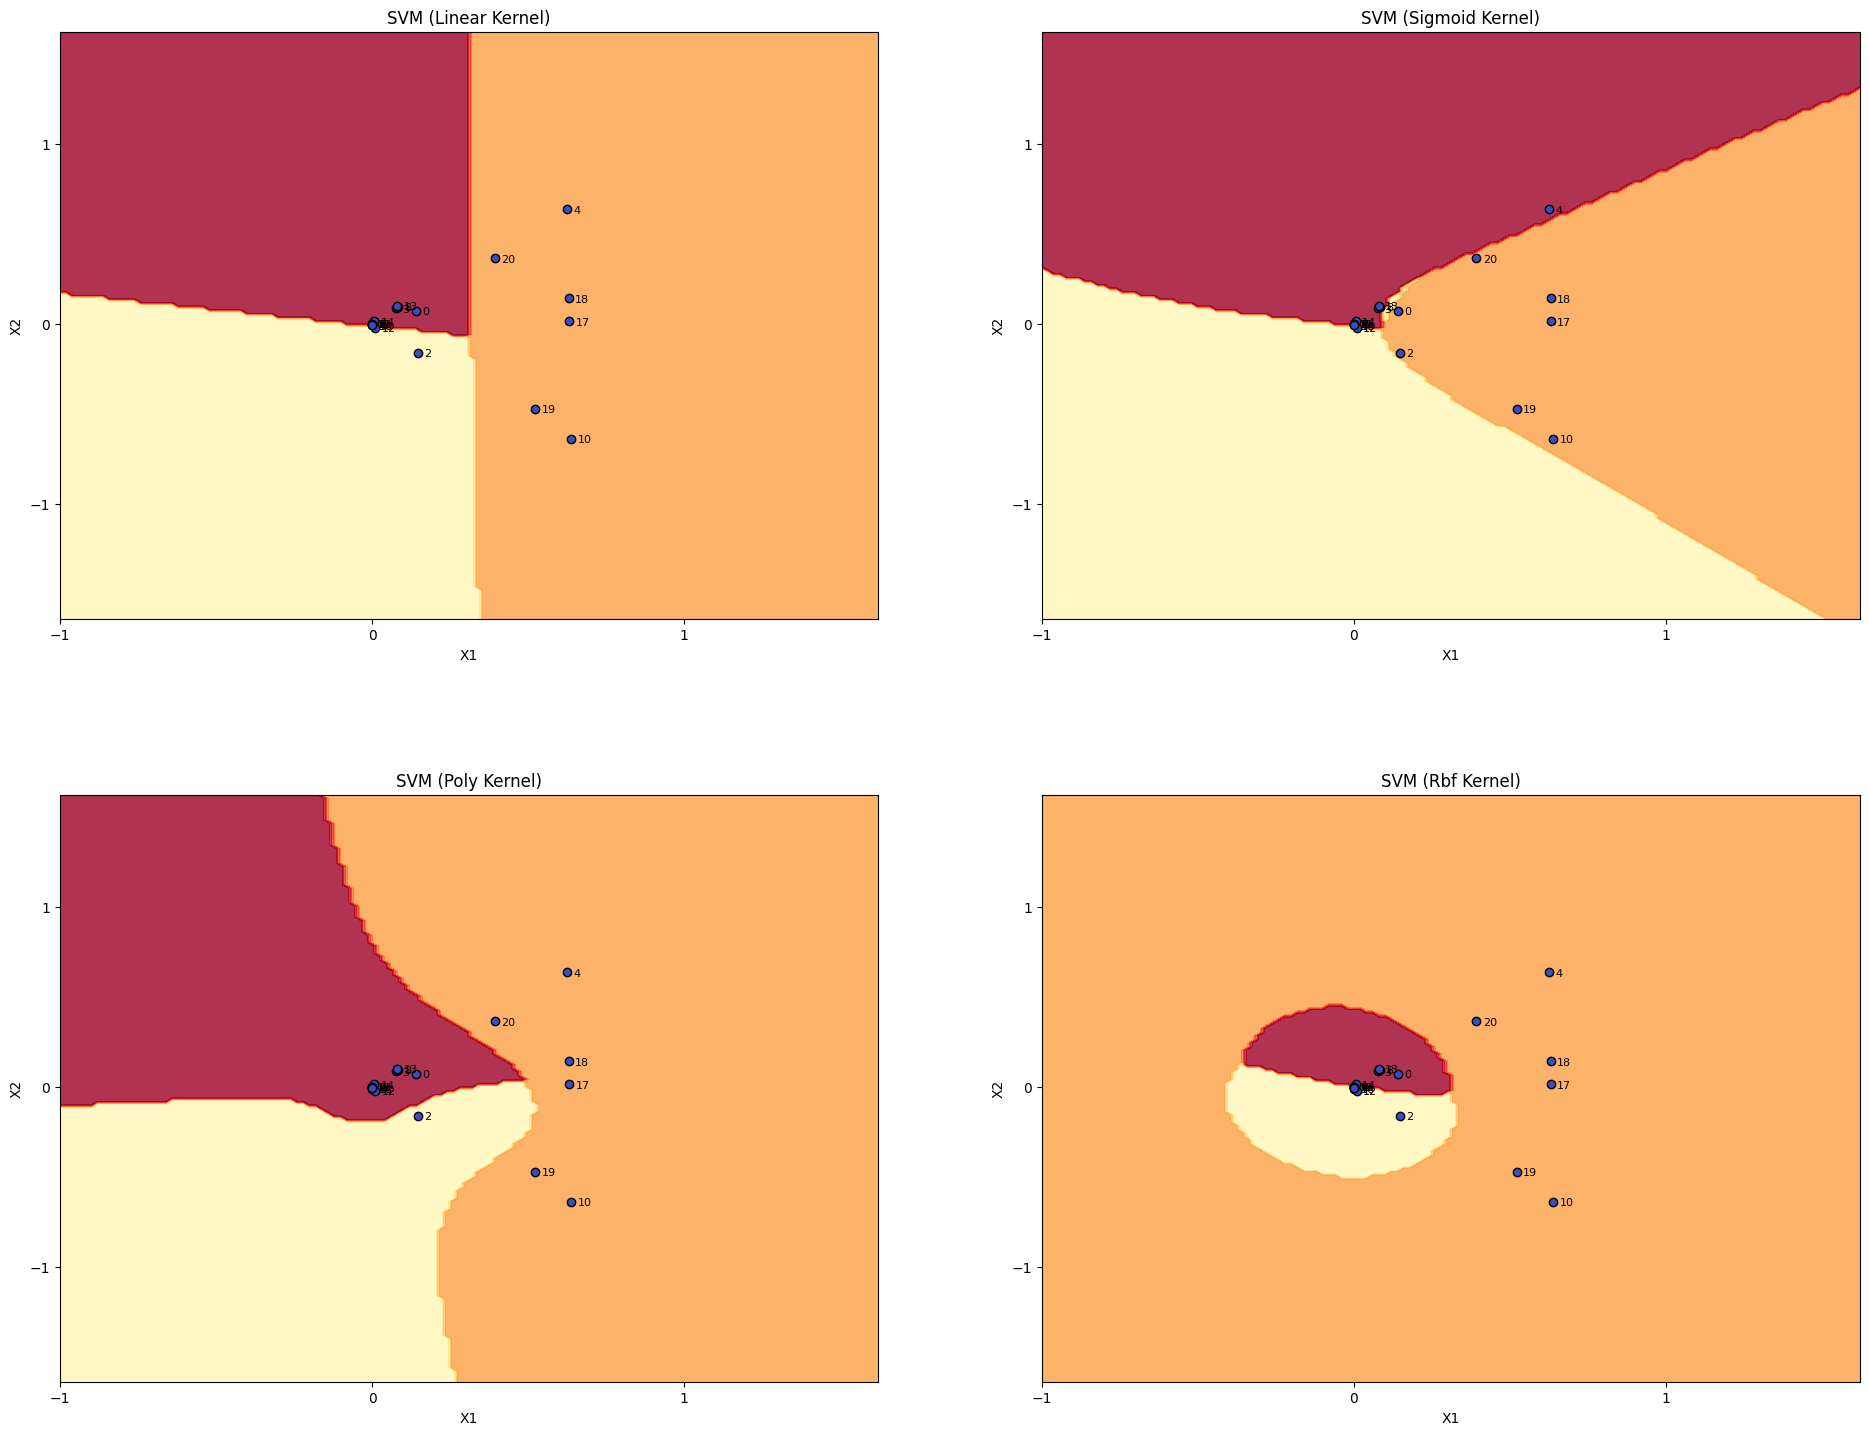

In [21]:
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

svd = TruncatedSVD(n_components=2, random_state=random_seed)
X_train_svd = svd.fit_transform(X_train_smote)
X_test_svd = svd.transform(X_test_chi2)

kernels = ['linear', 'sigmoid', 'poly', 'rbf']

plt.figure(figsize=(20, 15))

for i, kernel in enumerate(kernels):
   
    svm = SVC(kernel=kernel, random_state=random_seed)
    svm.fit(X_train_svd, y_train_smote)
    
    h = .02
    x_min, x_max = X_train_svd[:, 0].min() - 1, X_train_svd[:, 0].max() + 1
    y_min, y_max = X_train_svd[:, 1].min() - 1, X_train_svd[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(2, 2, i + 1) 
    plt.contourf(xx, yy, Z, cmap=plt.cm.YlOrRd, alpha=0.8)
    
    # Plot the data points with indices
    for idx, (x, y) in enumerate(X_train_svd):
        plt.scatter(x, y, c=[y_train_smote[idx]], cmap=plt.cm.coolwarm, edgecolor='k')
        plt.text(x + 0.02, y - 0.02, str(idx), fontsize=8)  # Add index as text near the data point
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(np.arange(int(x_min), int(x_max) + 1, 1.0))
    plt.yticks(np.arange(int(y_min), int(y_max) + 1, 1.0))
    plt.title(f'SVM ({kernel.capitalize()} Kernel)')

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.2, hspace=0.3)

plt.show()
